In [1]:
import pandas_datareader as pdr
import numpy as np
import pandas as pd

In [2]:
df=pdr.get_data_tiingo('GOOGL', api_key='a830a0b67bf989855f7e90758a395eff7e36c860')

In [3]:
df.to_csv("GOOGL.csv")

In [4]:
df.head()

close     high     low    open   volume  \
symbol date                                                                  
GOOGL  2015-11-02 00:00:00+00:00  747.74  748.180  731.45  737.88  1995708   
       2015-11-03 00:00:00+00:00  748.82  751.698  741.16  745.43  1815300   
       2015-11-04 00:00:00+00:00  755.31  759.900  749.20  749.90  2091999   
       2015-11-05 00:00:00+00:00  760.67  766.350  757.47  758.81  2274314   
       2015-11-06 00:00:00+00:00  761.60  763.022  755.03  759.39  1677199   

                                  adjClose  adjHigh  adjLow  adjOpen  \
symbol date                                                            
GOOGL  2015-11-02 00:00:00+00:00    747.74  748.180  731.45   737.88   
       2015-11-03 00:00:00+00:00    748.82  751.698  741.16   745.43   
       2015-11-04 00:00:00+00:00    755.31  759.900  749.20   749.90   
       2015-11-05 00:00:00+00:00    760.67  766.350  757.47   758.81   
       2015-11-06 00:00:00+00:00    761.60  763.022  755.03   759.39   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
GOOGL  2015-11-02 00:00:00+00:00    1995708      0.0          1.0  
       2015-11-03 00:00:00+00:00    1815300      0.0          1.0  
       2015-11-04 00:00:00+00:00    2091999      0.0          1.0  
       2015-11-05 00:00:00+00:00    2274314      0.0          1.0  
       2015-11-06 00:00:00+00:00    1677199      0.0          1.0

In [5]:
df.tail()

close      high      low       open  \
symbol date                                                               
GOOGL  2020-10-26 00:00:00+00:00  1584.29  1629.580  1567.78  1615.0000   
       2020-10-27 00:00:00+00:00  1598.88  1602.000  1576.99  1588.9319   
       2020-10-28 00:00:00+00:00  1510.80  1553.810  1508.48  1550.0100   
       2020-10-29 00:00:00+00:00  1556.88  1588.735  1516.55  1517.0200   
       2020-10-30 00:00:00+00:00  1616.11  1681.315  1601.57  1667.4400   

                                   volume  adjClose   adjHigh   adjLow  \
symbol date                                                              
GOOGL  2020-10-26 00:00:00+00:00  1791317   1584.29  1629.580  1567.78   
       2020-10-27 00:00:00+00:00  1295138   1598.88  1602.000  1576.99   
       2020-10-28 00:00:00+00:00  2258675   1510.80  1553.810  1508.48   
       2020-10-29 00:00:00+00:00  2770343   1556.88  1588.735  1516.55   
       2020-10-30 00:00:00+00:00  4983203   1616.11  1681.315  1601.57   

                                    adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                   
GOOGL  2020-10-26 00:00:00+00:00  1615.0000    1791317      0.0          1.0  
       2020-10-27 00:00:00+00:00  1588.9319    1295138      0.0          1.0  
       2020-10-28 00:00:00+00:00  1550.0100    2258675      0.0          1.0  
       2020-10-29 00:00:00+00:00  1517.0200    2770343      0.0          1.0  
       2020-10-30 00:00:00+00:00  1667.4400    4983203      0.0          1.0

In [6]:
df1=df.reset_index()['close']

In [7]:
df1.shape

(1259,)

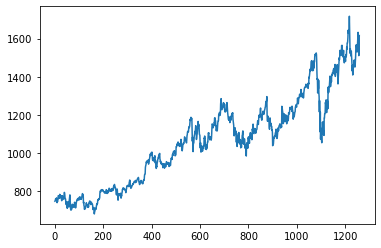

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [9]:
df1

0        747.74
1        748.82
2        755.31
3        760.67
4        761.60
         ...   
1254    1584.29
1255    1598.88
1256    1510.80
1257    1556.88
1258    1616.11
Name: close, Length: 1259, dtype: float64

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
df1.shape

(1259, 1)

In [12]:
df1

array([[0.06427021],
       [0.06531242],
       [0.07157539],
       ...,
       [0.80063691],
       [0.84510495],
       [0.90226297]])

In [13]:
#splitting training and test data
training_size=int(len(df1)*0.65)
testing_size=len(df1)-training_size
train_data, test_data=df1[0:training_size,:],df1[training_size:len(df1),:1] 

In [14]:
training_size, testing_size

(818, 441)

In [15]:
def create_dataset(dataset,time_steps=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_steps-1):
        a=dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [16]:
time_step=100
X_train,Y_train=create_dataset(train_data, time_step)
X_test,Y_test=create_dataset(test_data, time_step)

In [17]:
print(X_train)

[[0.06427021 0.06531242 0.07157539 ... 0.07374668 0.07112183 0.06961641]
 [0.06531242 0.07157539 0.07674789 ... 0.07112183 0.06961641 0.08178528]
 [0.07157539 0.07674789 0.07764536 ... 0.06961641 0.08178528 0.08414958]
 ...
 [0.51162364 0.49984077 0.48525935 ... 0.38876719 0.40566466 0.38477201]
 [0.49984077 0.48525935 0.47908323 ... 0.40566466 0.38477201 0.37531484]
 [0.48525935 0.47908323 0.47664174 ... 0.38477201 0.37531484 0.40226779]]


In [18]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [20]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(X_train,Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 5s 406ms/step - loss: 0.0219 - val_loss: 0.0614
Epoch 2/100
12/12 [==============================] - 2s 167ms/step - loss: 0.0051 - val_loss: 0.0056
Epoch 3/100
12/12 [==============================] - 2s 169ms/step - loss: 0.0021 - val_loss: 0.0050
Epoch 4/100
12/12 [==============================] - 2s 179ms/step - loss: 0.0016 - val_loss: 0.0071
Epoch 5/100
12/12 [==============================] - 2s 184ms/step - loss: 0.0012 - val_loss: 0.0076
Epoch 6/100
12/12 [==============================] - 3s 218ms/step - loss: 0.0011 - val_loss: 0.0057
Epoch 7/100
12/12 [==============================] - 2s 172ms/step - loss: 0.0011 - val_loss: 0.0055
Epoch 8/100
12/12 [==============================] - 2s 170ms/step - loss: 0.0011 - val_loss: 0.0052
Epoch 9/100
12/12 [==============================] - 2s 172ms/step - loss: 0.0011 - val_loss: 0.0062
Epoch 10/100
12/12 [==============================] - 3s 239ms/step - loss: 0.0010 - val_lo

Epoch 79/100
12/12 [==============================] - 3s 230ms/step - loss: 3.7447e-04 - val_loss: 0.0011
Epoch 80/100
12/12 [==============================] - 3s 241ms/step - loss: 4.3967e-04 - val_loss: 0.0015
Epoch 81/100
12/12 [==============================] - 3s 232ms/step - loss: 3.6555e-04 - val_loss: 0.0018
Epoch 82/100
12/12 [==============================] - 3s 243ms/step - loss: 3.9212e-04 - val_loss: 0.0012
Epoch 83/100
12/12 [==============================] - 3s 246ms/step - loss: 3.6176e-04 - val_loss: 0.0016
Epoch 84/100
12/12 [==============================] - 3s 245ms/step - loss: 3.3567e-04 - val_loss: 0.0010
Epoch 85/100
12/12 [==============================] - 3s 245ms/step - loss: 4.0658e-04 - val_loss: 0.0037
Epoch 86/100
12/12 [==============================] - 3s 256ms/step - loss: 3.5353e-04 - val_loss: 0.0016
Epoch 87/100
12/12 [==============================] - 3s 230ms/step - loss: 3.4284e-04 - val_loss: 0.0016
Epoch 88/100
12/12 [==========================

In [23]:
import tensorflow as tf

In [24]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [25]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [26]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

968.5230377354694

In [27]:
math.sqrt(mean_squared_error(Y_test,test_predict))

1330.1955588149654

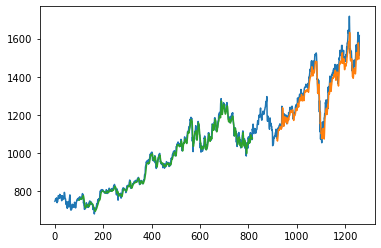

In [28]:
#plotting
look_back=100
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict

testPredictPlot=np.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1 : len(df1)-1, :]=test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(testPredictPlot)
plt.plot(trainPredictPlot)
plt.show()

In [54]:
len(test_data)

441

In [55]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [56]:
x_input=test_data[341:].reshape(1,-1)

In [57]:
x_input.shape

(1, 100)

In [58]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [59]:
from numpy import array

In [60]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.82209533]
101
1 day input [0.70618094 0.71372738 0.7385573  0.74441496 0.72663932 0.71749095
 0.74260072 0.75545476 0.725269   0.73337515 0.65756333 0.69098191
 0.71113148 0.73424367 0.76119662 0.78987696 0.78048733 0.79368878
 0.80822195 0.82786007 0.80201689 0.81034499 0.80650422 0.80461279
 0.80647527 0.85182147 0.84417853 0.85279614 0.80637877 0.79813752
 0.8186152  0.79373703 0.81290229 0.82724246 0.77858625 0.7735778
 0.76444873 0.77003619 0.79499156 0.78864174 0.78714596 0.77143546
 0.79720145 0.80628227 0.79468275 0.80588661 0.84404343 0.83326417
 0.86379735 0.86314113 0.87238601 0.89236188 0.92930277 0.91423884
 0.92476719 0.91521351 0.93986972 1.         0.91519421 0.86858384
 0.81298914 0.83579252 0.81535344 0.8054234  0.79873583 0.82410615
 0.80188179 0.77770808 0.74301568 0.72279855 0.75144029 0.70277443
 0.71577322 0.73140651 0.75032087 0.7574234  0.75701809 0.778538
 0.74736791 0.77364536 0.74294813 0.75078408 0.77422437 0.80029916
 0.85254524 0.85493848 0.85143546 0.

8 day output [[0.6464715]]
9 day input [0.725269   0.73337515 0.65756333 0.69098191 0.71113148 0.73424367
 0.76119662 0.78987696 0.78048733 0.79368878 0.80822195 0.82786007
 0.80201689 0.81034499 0.80650422 0.80461279 0.80647527 0.85182147
 0.84417853 0.85279614 0.80637877 0.79813752 0.8186152  0.79373703
 0.81290229 0.82724246 0.77858625 0.7735778  0.76444873 0.77003619
 0.79499156 0.78864174 0.78714596 0.77143546 0.79720145 0.80628227
 0.79468275 0.80588661 0.84404343 0.83326417 0.86379735 0.86314113
 0.87238601 0.89236188 0.92930277 0.91423884 0.92476719 0.91521351
 0.93986972 1.         0.91519421 0.86858384 0.81298914 0.83579252
 0.81535344 0.8054234  0.79873583 0.82410615 0.80188179 0.77770808
 0.74301568 0.72279855 0.75144029 0.70277443 0.71577322 0.73140651
 0.75032087 0.7574234  0.75701809 0.778538   0.74736791 0.77364536
 0.74294813 0.75078408 0.77422437 0.80029916 0.85254524 0.85493848
 0.85143546 0.84374427 0.85554644 0.81911701 0.83950784 0.87319662
 0.89314355 0.91854282 

16 day output [[0.5611906]]
17 day input [0.78048733 0.79368878 0.80822195 0.82786007 0.80201689 0.81034499
 0.80650422 0.80461279 0.80647527 0.85182147 0.84417853 0.85279614
 0.80637877 0.79813752 0.8186152  0.79373703 0.81290229 0.82724246
 0.77858625 0.7735778  0.76444873 0.77003619 0.79499156 0.78864174
 0.78714596 0.77143546 0.79720145 0.80628227 0.79468275 0.80588661
 0.84404343 0.83326417 0.86379735 0.86314113 0.87238601 0.89236188
 0.92930277 0.91423884 0.92476719 0.91521351 0.93986972 1.
 0.91519421 0.86858384 0.81298914 0.83579252 0.81535344 0.8054234
 0.79873583 0.82410615 0.80188179 0.77770808 0.74301568 0.72279855
 0.75144029 0.70277443 0.71577322 0.73140651 0.75032087 0.7574234
 0.75701809 0.778538   0.74736791 0.77364536 0.74294813 0.75078408
 0.77422437 0.80029916 0.85254524 0.85493848 0.85143546 0.84374427
 0.85554644 0.81911701 0.83950784 0.87319662 0.89314355 0.91854282
 0.87155609 0.88563571 0.80063691 0.84510495 0.90226297 0.82209533
 0.81484258 0.78917164 0.760097

24 day output [[0.47766694]]
25 day input [0.80647527 0.85182147 0.84417853 0.85279614 0.80637877 0.79813752
 0.8186152  0.79373703 0.81290229 0.82724246 0.77858625 0.7735778
 0.76444873 0.77003619 0.79499156 0.78864174 0.78714596 0.77143546
 0.79720145 0.80628227 0.79468275 0.80588661 0.84404343 0.83326417
 0.86379735 0.86314113 0.87238601 0.89236188 0.92930277 0.91423884
 0.92476719 0.91521351 0.93986972 1.         0.91519421 0.86858384
 0.81298914 0.83579252 0.81535344 0.8054234  0.79873583 0.82410615
 0.80188179 0.77770808 0.74301568 0.72279855 0.75144029 0.70277443
 0.71577322 0.73140651 0.75032087 0.7574234  0.75701809 0.778538
 0.74736791 0.77364536 0.74294813 0.75078408 0.77422437 0.80029916
 0.85254524 0.85493848 0.85143546 0.84374427 0.85554644 0.81911701
 0.83950784 0.87319662 0.89314355 0.91854282 0.87155609 0.88563571
 0.80063691 0.84510495 0.90226297 0.82209533 0.81484258 0.78917164
 0.7600975  0.7317819  0.70571053 0.68266821 0.66296357 0.6464715
 0.63273007 0.62107581 0

In [61]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)


In [62]:
len(df1)

1259

In [63]:
df3=df1.tolist()
df3.extend(lst_output)

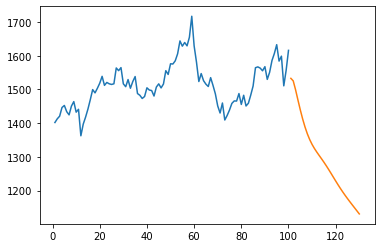

In [64]:
plt.plot(day_new, scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))